## **Importing Library**

In [11]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from utils.indicators import *


ModuleNotFoundError: No module named 'talib'

## Data Loading

In [2]:
FILE_PATH = r"..\src\datas\AAPL_historical_data.csv"

In [3]:
# Initialize loader
loader = DataLoader(FILE_PATH)

# Run comprehensive diagnostics
loader.missing_data_report()

### Missing Data Report

* **No missing data found.**

,Missing Values,Missing Percentage,Data Type,Critical
Date,0,0.0,datetime64[ns],No
Open,0,0.0,float64,Yes
High,0,0.0,float64,Yes
Low,0,0.0,float64,Yes
Close,0,0.0,float64,Yes
Adj Close,0,0.0,float64,Yes
Volume,0,0.0,int64,No
Dividends,0,0.0,float64,No
Stock Splits,0,0.0,float64,No


In [4]:
loader.data_health_check()


### Data Health Report
- **Date Range**: 1980-12-12 to 2024-07-30
- **Total Calendar Days**: 15937
- **Trading Days**: 10998 (69.01% coverage)
- **Missing Dates**: 4939
- **Zero Volume Days**: 1
- **Days with Negative Prices**: 0

⚠️ **Warning**: Low date coverage (69.01%). Significant missing dates.

{'start_date': Timestamp('1980-12-12 00:00:00'),
 'end_date': Timestamp('2024-07-30 00:00:00'),
 'total_days': 15936,
 'trading_days': 10998,
 'completeness': 0.6900922381878647,
 'zero_volume_days': np.int64(1),
 'negative_price_days': np.int64(0)}

In [5]:

loader.get_price_statistics()

### Price Statistics

,count,mean,std,min,25%,50%,75%,max,volatility
Open,10998.0,22.299160,46.003685,0.049665,0.299107,0.531250,20.204196,236.479996,NaN
High,10998.0,22.539055,46.496031,0.049665,0.303710,0.537946,20.389554,237.229996,NaN
Low,10998.0,22.068367,45.540929,0.049107,0.290179,0.522321,19.998036,233.089996,NaN
Close,10998.0,22.312754,46.037660,0.049107,0.298549,0.531250,20.196160,234.820007,0.442814
Adj Close,10998.0,21.494496,45.561916,0.037857,0.241840,0.432079,17.253029,234.548523,NaN


,count,mean,std,min,25%,50%,75%,max,volatility
Open,10998.0,22.299160,46.003685,0.049665,0.299107,0.531250,20.204196,236.479996,NaN
High,10998.0,22.539055,46.496031,0.049665,0.303710,0.537946,20.389554,237.229996,NaN
Low,10998.0,22.068367,45.540929,0.049107,0.290179,0.522321,19.998036,233.089996,NaN
Close,10998.0,22.312754,46.037660,0.049107,0.298549,0.531250,20.196160,234.820007,0.442814
Adj Close,10998.0,21.494496,45.561916,0.037857,0.241840,0.432079,17.253029,234.548523,NaN


c:\Users\segni\Documents\GitHub\predict-price-moves-news-sentiment-weak-1\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)



### Volume Analysis
- **Average Daily Volume**: 318,080,644
- **Peak Volume**: 7,421,640,800
- **Lowest Volume**: 0
- **High Volume Days (>1.5x avg)**: 2082


c:\Users\segni\Documents\GitHub\predict-price-moves-news-sentiment-weak-1\notebooks\utils\dataPreprocess.py:229: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = self.data.set_index('Date')['Volume'].resample('M').sum()


{'avg_volume': np.float64(318080644.3717039),
 'max_volume': np.int64(7421640800),
 'min_volume': np.int64(0),
 'volume_volatility': np.float64(nan),
 'high_volume_days': np.int64(2082)}

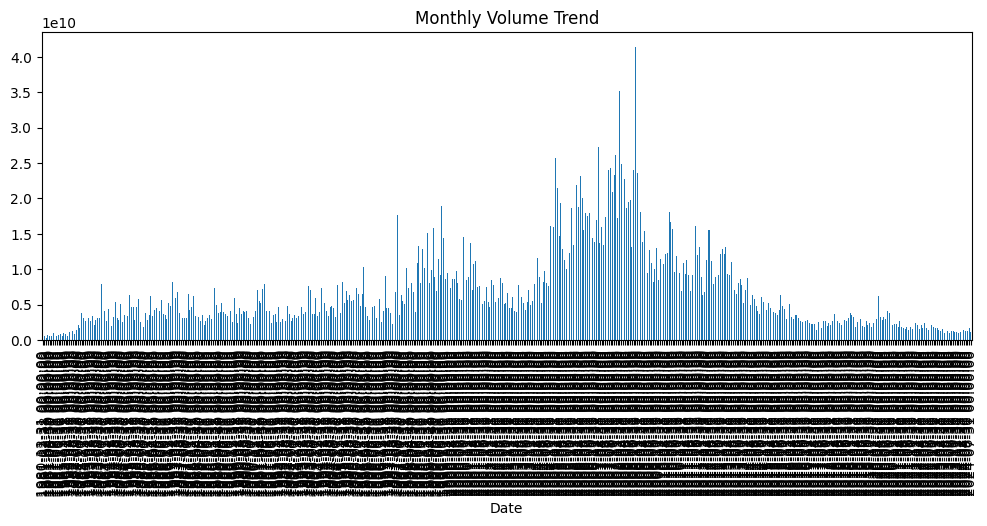

In [6]:
loader.get_volume_analysis()

In [7]:

loader.get_corporate_actions_summary()

### Corporate Actions Summary
- **Dividend Payments**: 83 days
- **Total Dividends**: $8.2736 per share
- **Average Dividend**: $0.0997 per payment
- **Stock Splits**: 5 occurrences
- **Last Split**: 2020-08-31


{'dividends': {'count': np.int64(83),
  'total': np.float64(8.273564),
  'avg': np.float64(0.09968149397590362)},
 'splits': {'count': np.int64(5),
  'last_split': Timestamp('2020-08-31 00:00:00')}}

### News Impact Analysis: 2023-01-15

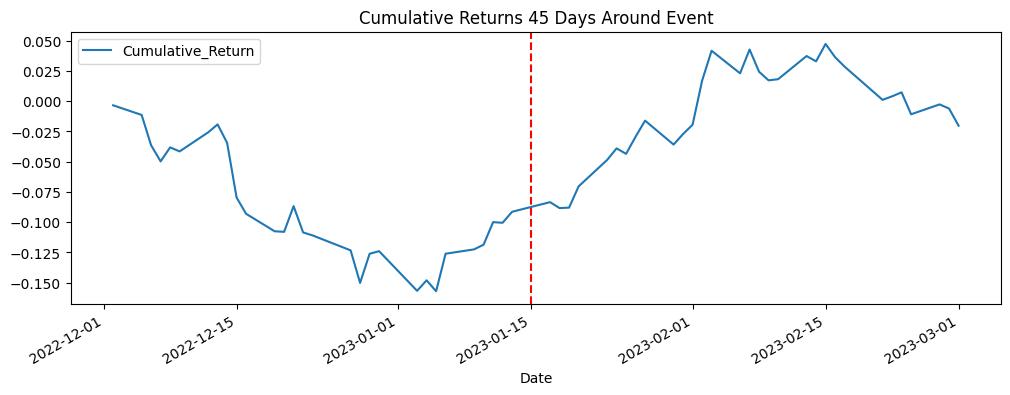

In [8]:
# Analyze news impact
news_analysis = loader.get_news_impact_analysis('2023-01-15', window=45)

In [9]:
df = loader.load_data()

DP = DataPreprocessor(df)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [10]:
preprocessed_df = DP.get_processed_data()


preprocessed_df.head()

df.shape, preprocessed_df.shape

((10998, 9), (10998, 8))